<a href="https://colab.research.google.com/github/samirgadkari/DS-Sprint-02-Storytelling-With-Data/blob/master/Copy_of_DS_Unit_1_Sprint_Challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

# Storytelling with Data

In this sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

# Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv')
df.rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'}, inplace=True)

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

In [3]:
df.shape

(2693, 6)

In [4]:
df.describe()

,Year
count,2693.000000
mean,2006.816190
std,4.828177
min,1999.000000
25%,2003.000000
50%,2007.000000
75%,2011.000000
max,2015.000000


In [5]:
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


# Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
1. Use pandas to make a **crosstab** of **`Year`** & **`Occupation`**. ([This documentation](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#cross-tabulations) has examples and explanation.)
2. To get percentages instead of counts, use crosstab's **`normalize`** parameter to normalize over each _row._ ([This documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html) describes the parameter and its options.)
3. You'll know you've calculated the crosstab correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

In [6]:
ct = pd.crosstab(df['Year'], df['Occupation'], normalize = 'index')
ct

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,0.903614,0.012048,0.066265,0.018072
2000,0.739645,0.082840,0.124260,0.053254
2001,0.726115,0.038217,0.197452,0.038217
2002,0.622642,0.069182,0.264151,0.044025
2003,0.560241,0.102410,0.246988,0.090361
2004,0.384146,0.225610,0.274390,0.115854
2005,0.370370,0.160494,0.333333,0.135802
2006,0.360248,0.192547,0.291925,0.155280
2007,0.255319,0.170213,0.333333,0.241135


# Part 2 — Recreate this explanatory visualization:

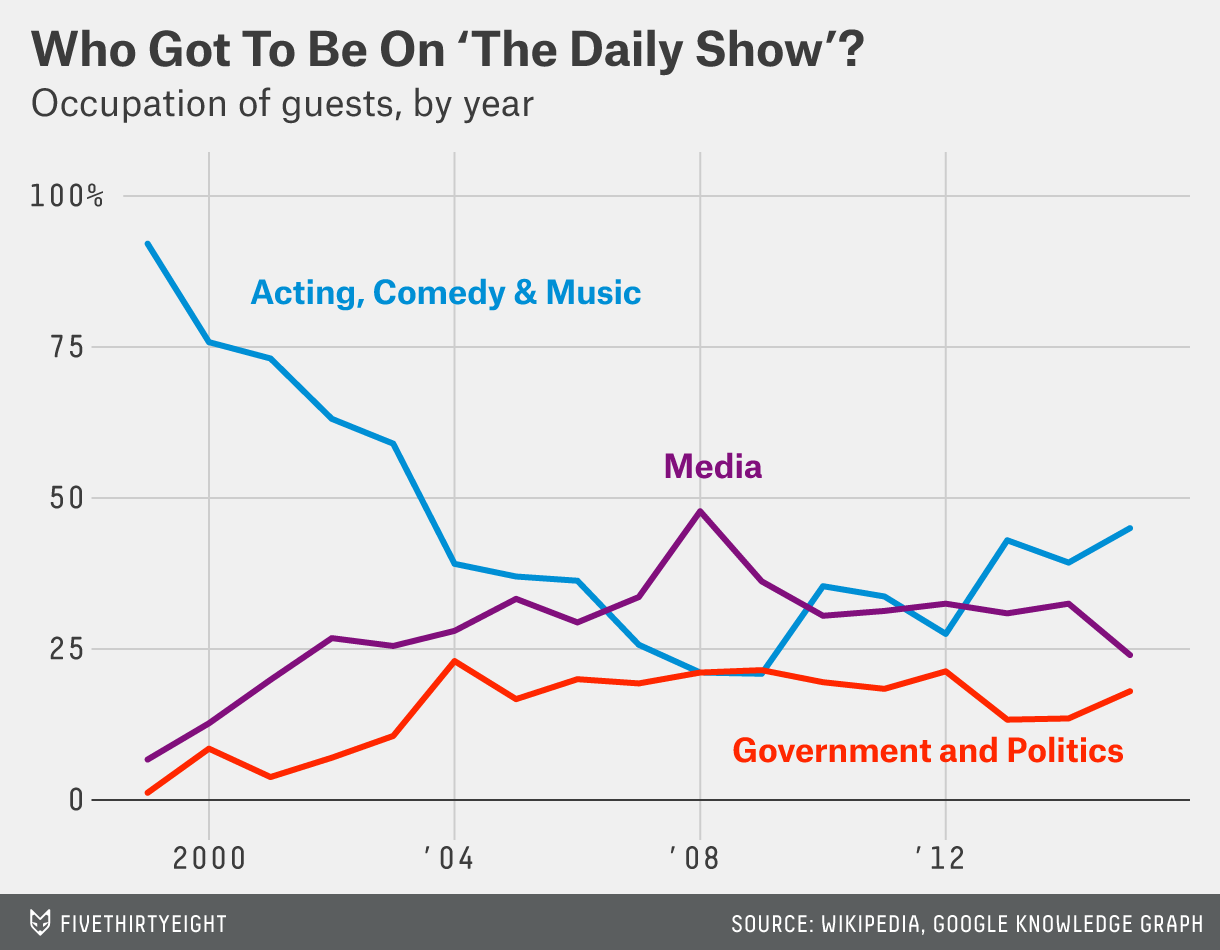

In [7]:
from IPython.display import display, Image
url = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(url, width=500)
display(example)

**Hint:** use the crosstab you calculated in part 1!

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

Any visual element not specifically mentioned in the expectations is an optional bonus, but it's _not_ required to pass the Sprint Challenge.






In [8]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [9]:
import seaborn as sns
sns.__version__

'0.9.0'

In [10]:
ct.index.values

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015])

In [11]:
ct.head(1)

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,0.903614,0.012048,0.066265,0.018072


In [28]:
ct_unstacked = ct.unstack()
ct_unstacked

Occupation               Year
Acting, Comedy & Music   1999    0.903614
                         2000    0.739645
                         2001    0.726115
                         2002    0.622642
                         2003    0.560241
                         2004    0.384146
                         2005    0.370370
                         2006    0.360248
                         2007    0.255319
                         2008    0.207317
                         2009    0.208589
                         2010    0.351515
                         2011    0.337423
                         2012    0.268293
                         2013    0.427711
                         2014    0.392638
                         2015    0.450000
Government and Politics  1999    0.012048
                         2000    0.082840
                         2001    0.038217
                         2002    0.069182
                         2003    0.102410
                         2004    0.225610
    

In [30]:
list(ct_unstacked.index.levels[0])

['Acting, Comedy & Music', 'Government and Politics', 'Media', 'Other']

In [31]:
ct_unstacked.index

MultiIndex(levels=[['Acting, Comedy & Music', 'Government and Politics', 'Media', 'Other'], [1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]],
           names=['Occupation', 'Year'])

In [58]:
ct_unstacked['Acting, Comedy & Music']

Year
1999    0.903614
2000    0.739645
2001    0.726115
2002    0.622642
2003    0.560241
2004    0.384146
2005    0.370370
2006    0.360248
2007    0.255319
2008    0.207317
2009    0.208589
2010    0.351515
2011    0.337423
2012    0.268293
2013    0.427711
2014    0.392638
2015    0.450000
dtype: float64

In [36]:
len(ct_unstacked['Acting, Comedy & Music'])

17

In [61]:
first_col = ['Acting, Comedy & Music'] * len(ct_unstacked['Acting, Comedy & Music'])
years_col = range(1999, 2016)
first_col_df = pd.DataFrame([years_col, first_col, ct.loc[:, 'Acting, Comedy & Music']])
first_col = first_col_df.T.rename(str, {0: 'Year', 1: 'Guest type', 2: 'Percentages'})
first_col

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Intepreting call
	'.rename(a, b)' as 
	'.rename(index=a, columns=b)'.
Use named arguments to remove any ambiguity. In the future, using positional arguments for 'index' or 'columns' will raise  a 'TypeError'.
  after removing the cwd from sys.path.


,Year,Guest type,Percentages
0,1999,"Acting, Comedy & Music",0.903614
1,2000,"Acting, Comedy & Music",0.739645
2,2001,"Acting, Comedy & Music",0.726115
3,2002,"Acting, Comedy & Music",0.622642
4,2003,"Acting, Comedy & Music",0.560241
5,2004,"Acting, Comedy & Music",0.384146
6,2005,"Acting, Comedy & Music",0.37037
7,2006,"Acting, Comedy & Music",0.360248
8,2007,"Acting, Comedy & Music",0.255319
9,2008,"Acting, Comedy & Music",0.207317


In [63]:
second_col = ['Government and Politics'] * len(ct_unstacked['Government and Politics'])
second_col_df = pd.DataFrame([years_col, second_col, ct.loc[:, 'Government and Politics']])
second_col = second_col_df.T.rename(str, {0: 'Year', 1: 'Guest type', 2: 'Percentages'})
second_col

third_col = ['Media'] * len(ct_unstacked['Media'])
third_col_df = pd.DataFrame([years_col, third_col, ct.loc[:, 'Media']])
third_col = third_col_df.T.rename(str, {0: 'Year', 1: 'Guest type', 2: 'Percentages'})
third_col

fourth_col = ['Other'] * len(ct_unstacked['Other'])
fourth_col_df = pd.DataFrame([years_col, fourth_col, ct.loc[:, 'Other']])
fourth_col = fourth_col_df.T.rename(str, {0: 'Year', 1: 'Guest type', 2: 'Percentages'})
fourth_col

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Intepreting call
	'.rename(a, b)' as 
	'.rename(index=a, columns=b)'.
Use named arguments to remove any ambiguity. In the future, using positional arguments for 'index' or 'columns' will raise  a 'TypeError'.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Intepreting call
	'.rename(a, b)' as 
	'.rename(index=a, columns=b)'.
Use named arguments to remove any ambiguity. In the future, using positional arguments for 'index' or 'columns' will raise  a 'TypeError'.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: Intepreting call
	'.rename(a, b)' as 
	'.rename(index=a, columns=b)'.
Use named arguments to remove any ambiguity. In the future, using positional arguments for 'index' or 'columns' will raise  a 'TypeError'.
  del sys.path[0]


,Year,Guest type,Percentages
0,1999,Other,0.0180723
1,2000,Other,0.0532544
2,2001,Other,0.0382166
3,2002,Other,0.0440252
4,2003,Other,0.0903614
5,2004,Other,0.115854
6,2005,Other,0.135802
7,2006,Other,0.15528
8,2007,Other,0.241135
9,2008,Other,0.121951


In [64]:
merged_df = first_col.append(second_col).append(third_col).append(fourth_col)
merged_df

,Year,Guest type,Percentages
0,1999,"Acting, Comedy & Music",0.903614
1,2000,"Acting, Comedy & Music",0.739645
2,2001,"Acting, Comedy & Music",0.726115
3,2002,"Acting, Comedy & Music",0.622642
4,2003,"Acting, Comedy & Music",0.560241
5,2004,"Acting, Comedy & Music",0.384146
6,2005,"Acting, Comedy & Music",0.37037
7,2006,"Acting, Comedy & Music",0.360248
8,2007,"Acting, Comedy & Music",0.255319
9,2008,"Acting, Comedy & Music",0.207317


In [74]:
type(merged_df.iloc[0, 0]), type(merged_df.iloc[0, 1]), type(merged_df.iloc[0, 2])

(int, str, float)

In [78]:
merged_df.dtypes

Year           object
Guest type     object
Percentages    object
dtype: object

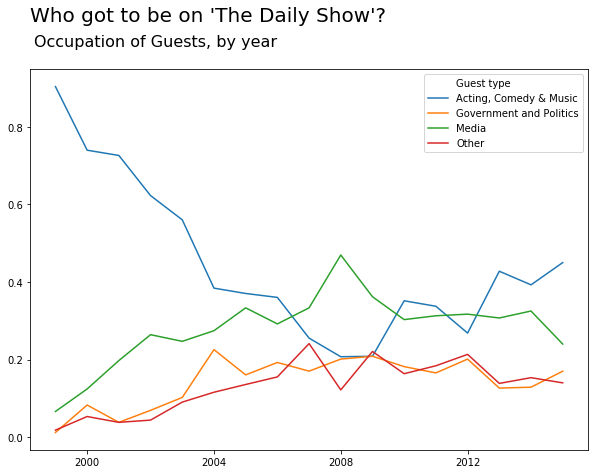

In [97]:
import matplotlib.ticker as ticker

plt.figure(figsize = (10, 7))
ax = sns.lineplot(x = pd.to_numeric(merged_df['Year']),
             y = pd.to_numeric(merged_df['Percentages']),
             hue = merged_df['Guest type']
            );
plt.title(s = "Who got to be on 'The Daily Show'?",
          x = 0,
          y = 1.11,
          fontsize = 20,
          ha = 'left')
plt.suptitle(t = 'Occupation of Guests, by year',
             x = 0.13,
             y = 0.95,
             fontsize = 16,
             fontweight = 'ultralight',
             ha = 'left')
ax.set(xlabel = '',
       ylabel = '',
       xticks = range(2000, 2013, 4)
      );

# xlabels = ['', '2000', "'04", "'08", "'12"]
# @ticker.FuncFormatter
# def major_formatter(x, pos):
#   return xlabels[pos]
  
# for tick in ax.xaxis.get_major_ticks():
#     tick.label1.set_horizontalalignment('center')
# ax.xaxis.set_major_formatter(major_formatter)



# Part 3 — Who were the top 10 guests on _The Daily Show_?

**Make a plot** that shows their names and number of appearances.

**Hint:** you can use the pandas `value_counts` method.

**Expectations:** This can be a simple, quick plot: exploratory, not explanatory. 

If you want, you can add titles and change aesthetics, but it's _not_ required to pass the Sprint Challenge.

In [117]:
top_guests = df['Guest'].value_counts()[:10].to_frame()
top_guests

,Guest
Fareed Zakaria,19
Denis Leary,17
Brian Williams,16
Ricky Gervais,13
Paul Rudd,13
Tom Brokaw,12
Will Ferrell,10
Reza Aslan,10
Richard Lewis,10
Bill O'Reilly,10


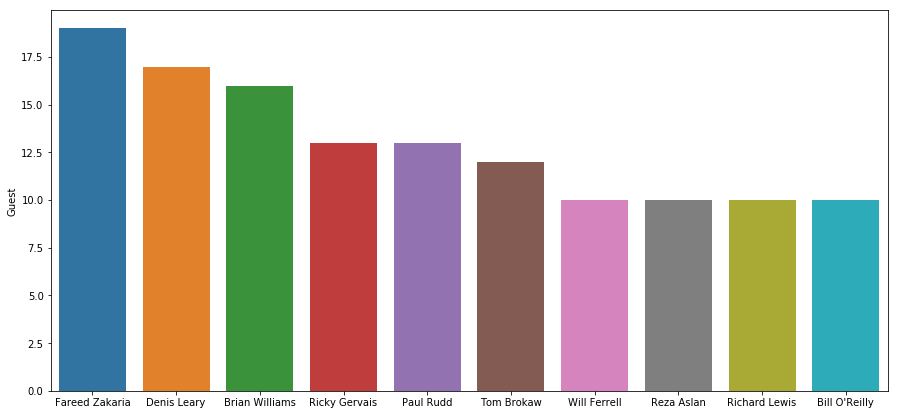

In [124]:
plt.figure(figsize = (15, 7))
sns.barplot(x = top_guests.index,
            y = top_guests.Guest);